<a href="https://colab.research.google.com/github/thourayaaromdhanii/4_In_Shield/blob/master/WLSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.flush_and_unmount()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install remotezip tqdm opencv-python
!pip install -q git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for remotezip: filename=remotezip-0.12.1-py3-none-any.whl size=7949 sha256=8454655ab5e1f21629cc35b9182bdfecbeb6b81bfa4104deca2fc7fbe0029d77
  Stored in directory: /root/.cache/pip/wheels/fc/76/04/beed1a6df4eb7430ee13c3900746edd517e5e597298d1f73f3
Successfully built remotezip
  Preparing metadata (setup.py) ... done


In [3]:
# The way this tutorial uses the `TimeDistributed` layer requires TF>=2.10!
!pip install -U "tensorflow>=2.10.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import json
import os
import shutil
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import tqdm
import pathlib
import itertools
import collections
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Some modules to display an animation using imageio.
import imageio
from IPython import display

from tensorflow_docs.vis import embed
from urllib import request
from tensorflow.keras.optimizers.legacy import Adam
data_dir = '/content/drive/Shareddrives/Pfe/videos_'


In [5]:
def get_class(fname):
  items = os.listdir(fname)
  # Loop through each item and count the number of folders
  folder_count = 0
  classes=[]
  for item in items:
    # Check if the item is a folder
    if os.path.isdir(os.path.join(fname, item)):
        folder_count += 1
        classes.append(item)


  return items

In [ ]:
def data_split(folder):

  
  split_1_folder = "/content/drive/Shareddrives/Pfe/data/train"
  split_2_folder = "/content/drive/Shareddrives/Pfe/data/test"
  split_3_folder = "/content/drive/Shareddrives/Pfe/data/val"

# get a list of all files in the original folder
  file_list = os.listdir(folder)

# calculate the size of each split
  num_files = len(file_list)
  train_split_size = round(num_files *0.6)
  test_split_size = round(num_files *0.2)
  val_split_size = round(num_files *0.2)

# split the file list into three subsets
  split_1_files = file_list[:train_split_size]
  split_2_files = file_list[train_split_size:train_split_size+test_split_size]
  split_3_files = file_list[train_split_size+test_split_size:]
  f_name=folder.rsplit('/', 1)[1]
# copy the files to the destination folders
  for file_name in split_1_files:
    os.makedirs(split_1_folder +f'/{f_name}', exist_ok=True)
    os.makedirs(split_2_folder +f'/{f_name}', exist_ok=True)
    os.makedirs(split_3_folder +f'/{f_name}', exist_ok=True)
    shutil.copy(os.path.join(folder, file_name), split_1_folder +f'/{f_name}')
  for file_name in split_2_files:
    shutil.copy(os.path.join(folder, file_name), split_2_folder+f'/{f_name}')
  for file_name in split_3_files:
    shutil.copy(os.path.join(folder, file_name), split_3_folder+f'/{f_name}')


In [ ]:
classes=get_class(data_dir)

In [ ]:
classes

In [ ]:
for item in classes:
  data_split(data_dir+f'/{item}')


In [ ]:
get_class('/content/drive/Shareddrives/Pfe/data/train')

In [ ]:
get_class('/content/drive/Shareddrives/Pfe/data/test')

In [ ]:
get_class('/content/drive/Shareddrives/Pfe/data/val')

In [ ]:
path='/content/drive/Shareddrives/Pfe/data/val'
path.rsplit('/', 1)[1]

'val'

In [ ]:
# Set the path to the directory containing the videos

# Get a list of all the class directories in the data directory
class_dirs = [os.path.join(data_dir, d) for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Define the train/validation/test split ratio
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Create empty lists to hold the video file paths and class labels
video_files = []
labels = []

# Loop over the class directories and get the video file paths and labels
for i, class_dir in enumerate(class_dirs):
    print(class_dir)
    class_label = i
    class_videos = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith('.mp4')]
    video_files.extend(class_videos)
    #print([class_label] * len(class_videos),class_videos)
    labels.extend([class_label] * len(class_videos))
print(video_files)
# Split the data into train/validation/test sets
X_train, X_test, y_train, y_test = train_test_split(video_files, labels, test_size=test_ratio, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)

#Print the number of files in each set
print(f"Number of training files: {len(X_train)}")
print(f"Number of validation files: {len(X_val)}")
print(f"Number of test files: {len(X_test)}")

In [ ]:
def move_videos_to_subdir_split(dataframe,split):
    file_count=0
    for path in dataframe["video"].unique():
          folder_name_= path.rsplit('/', 2)[1]
          file_name_= path.rsplit('/', 1)[1]
          dst_path = f'/content/drive/Shareddrives/Pfe/dataset/{split}/{folder_name_}'
          os.makedirs(dst_path, exist_ok=True)
          
          if os.path.exists(os.path.join(dst_path, file_name_)):
            file_count=file_count+1
            print(file_count)
          else:
            dst = dst_path + f'/{file_name_}'
            shutil.copyfile(path, dst)




In [ ]:
train_df = pd.DataFrame(columns=[ 'video','label'])
df = pd.DataFrame(list(zip(X_train, y_train)), columns=train_df.columns)
train_df = train_df.append(df, ignore_index=True)

<ipython-input-106-9fdfb080ccf6>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(df, ignore_index=True)


In [ ]:
ff_ff=[]
for path in val_df["video"].unique():
        folder_name_= path.rsplit('/', 2)[1]
        ff_ff.append(folder_name_)
        file_name_= path.rsplit('/', 1)[1]

In [ ]:
unique_values = set(ff_ff)
count_unique_values = len(unique_values)
print(count_unique_values)

1972


In [ ]:
test_df = pd.DataFrame(columns=[ 'video','label'])
df = pd.DataFrame(list(zip(X_test, y_test)), columns=test_df.columns)
test_df = test_df.append(df, ignore_index=True)

<ipython-input-97-c7be796392cd>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(df, ignore_index=True)


In [ ]:
val_df = pd.DataFrame(columns=[ 'video','label'])
df = pd.DataFrame(list(zip(X_val, y_val)), columns=val_df.columns)
val_df = val_df.append(df, ignore_index=True)

<ipython-input-109-74083cc23ba0>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val_df = val_df.append(df, ignore_index=True)


In [ ]:
train_df.to_csv('/content/drive/Shareddrives/Pfe/train_df.csv',columns=[ 'video','label'])
test_df.to_csv('/content/drive/Shareddrives/Pfe/test_df.csv',columns=[ 'video','label'])
val_df.to_csv('/content/drive/Shareddrives/Pfe/val_df.csv',columns=[ 'video','label'])

In [ ]:
train_df_from_csv=pd.read_csv('/content/drive/Shareddrives/Pfe/train_df.csv')
test_df_from_csv=pd.read_csv('/content/drive/Shareddrives/Pfe/test_df.csv')
val_df_from_csv=pd.read_csv('/content/drive/Shareddrives/Pfe/val_df.csv')

In [ ]:
print(len(val_df_from_csv.index),len(test_df_from_csv.index),len(train_df_from_csv.index))

7870 7870 23608


In [ ]:
move_videos_to_subdir_split(train_df_from_csv,'Train')

In [ ]:
move_videos_to_subdir_split(test_df_from_csv,'Test')

In [ ]:
move_videos_to_subdir_split(val_df_from_csv,'Val')

In [6]:
def get_split_count(fname):
  file_counts = {}
  tot=0

  # Walk through the directory tree and count the files in each folder
  for root, dirs, files in os.walk(fname):
      file_counts[root] = len(files)
  # Print the file counts for each folder
  for folder, count in file_counts.items():
     tot=count+tot

  return tot

In [ ]:
train_count=get_split_count('/content/drive/Shareddrives/Pfe/data/train')
test_count=get_split_count('/content/drive/Shareddrives/Pfe/data/test')
val_count=get_split_count('/content/drive/Shareddrives/Pfe/data/val')

In [ ]:
video_total =train_count+val_count+test_count
print('train_count : ',train_count)
print('test_count : ',test_count)
print('val_countidation : ',val_count)
print('total : ',video_total )

train_count :  23563
test_count :  7993
val_countidation :  7792
total :  39348


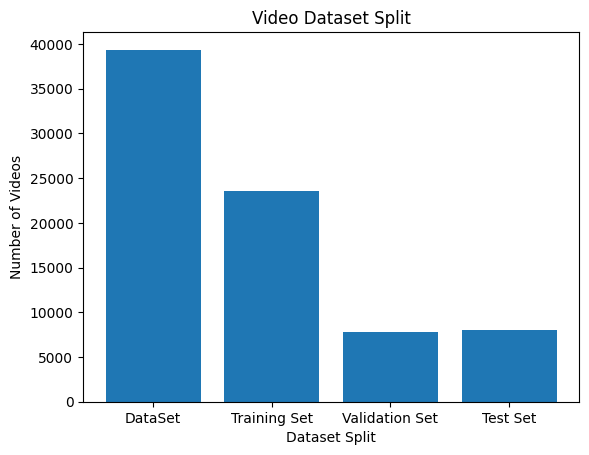

In [ ]:
# Set up the plot
fig, ax = plt.subplots()

# Create a bar chart showing the number of images in each folder
ax.bar(["DataSet","Training Set",  "Validation Set",  "Test Set"], [video_total,train_count, val_count,  test_count])

# Set the title and axis labels
ax.set_title("Video Dataset Split")
ax.set_xlabel("Dataset Split")
ax.set_ylabel("Number of Videos")

# Show the plot
plt.show()

In [ ]:
folder_path = "/content/drive/MyDrive/videos_/a"
folder_name = os.path.basename(folder_path)
print(folder_name)

a


In [ ]:
for root, dirs, files in os.walk('/content/drive/MyDrive/videos_/a'):
     print(root,dirs,files)


In [ ]:
get_class('/content/drive/Shareddrives/Pfe/videos_')

In [7]:
def get_files_per_class(fname):
  files_for_class = collections.defaultdict(list)
  file_counts = {} 
  for root, dirs, files in os.walk(fname):
    if(root==fname):
      continue
    else:
      files_for_class[root.rsplit('/', 1)[1]]=files
  return  files_for_class

In [ ]:
len(get_class('/content/drive/Shareddrives/Pfe/data/test')
)

2000

In [ ]:
files_for_class_ = get_files_per_class('/content/drive/Shareddrives/Pfe/data/val')
classes = list(files_for_class_.keys())

In [ ]:
print(files_for_class_)

defaultdict(<class 'list'>, {'book': ['07070_edge_1.mp4', '69241_gray1.mp4', '07068_flipv_1.mp4', '07070_fliph_1.mp4'], 'drink': ['69302_noise_0.mp4', '17724_edge_0.mp4', '17711_gray0.mp4', '17720_flipv_0.mp4', '69302_fliph_0.mp4'], 'computer': ['12328_edge_0.mp4', '12320_gray0.mp4', '12319_flipv_0.mp4', '12312_fliph_0.mp4'], 'before': ['05750_edge_0.mp4', '05734_gray0.mp4', '05728_flipv_0.mp4', '05732_fliph_0.mp4'], 'chair': ['09854_edge_1.mp4', '09849_gray1.mp4', '65328_flipv_1.mp4', '09851_fliph_1.mp4'], 'go': ['24954_noise_0.mp4', '24943_edge_0.mp4', '24955_gray0.mp4', '69345_flipv_0.mp4', '24946_fliph_0.mp4'], 'clothes': ['11309_edge_1.mp4', '11309_gray1.mp4', '11313_flipv_1.mp4', '11311_fliph_1.mp4'], 'who': ['63227_edge_0.mp4', '63229_gray0.mp4', '63227_flipv_0.mp4', '69534_fliph_0.mp4'], 'candy': ['08917_edge_0.mp4', '08929_gray0.mp4', '08915_flipv_0.mp4', '08924_fliph_0.mp4'], 'cousin': ['13642_edge_0.mp4', '13634_gray0.mp4', '13631_flipv_0.mp4', '13636_fliph_0.mp4'], 'deaf': 

In [ ]:

print('Num classes:', len(classes))
for i in range( len(classes)):
  print('Num videos for',  classes[i],':',len(files_for_class_[classes[i]]))

Num classes: 2000
Num videos for book : 4
Num videos for drink : 5
Num videos for computer : 4
Num videos for before : 4
Num videos for chair : 4
Num videos for go : 5
Num videos for clothes : 4
Num videos for who : 4
Num videos for candy : 4
Num videos for cousin : 4
Num videos for deaf : 3
Num videos for fine : 4
Num videos for help : 4
Num videos for no : 3
Num videos for thin : 4
Num videos for walk : 3
Num videos for year : 4
Num videos for yes : 4
Num videos for all : 5
Num videos for black : 4
Num videos for cool : 4
Num videos for finish : 4
Num videos for hot : 4
Num videos for like : 4
Num videos for many : 4
Num videos for mother : 3
Num videos for now : 4
Num videos for orange : 4
Num videos for table : 4
Num videos for thanksgiving : 4
Num videos for what : 4
Num videos for woman : 3
Num videos for bed : 4
Num videos for blue : 5
Num videos for bowling : 4
Num videos for can : 4
Num videos for dog : 3
Num videos for family : 3
Num videos for fish : 4
Num videos for graduat

In [8]:
def format_frames(frame, output_size):
  """
    Pad and resize an image from a video.

    Args:
      frame: Image that needs to resized and padded. 
      output_size: Pixel size of the output frame image.

    Return:
      Formatted frame with padding of specified output size.
  """
  frame = tf.image.convert_image_dtype(frame, tf.float32)
  frame = tf.image.resize_with_pad(frame, *output_size)
  return frame

In [9]:
def frames_from_video_file(video_path, n_frames, output_size = (224,224), frame_step = 15):
  """
    Creates frames from each video file present for each category.

    Args:
      video_path: File path to the video.
      n_frames: Number of frames to be created per video file.
      output_size: Pixel size of the output frame image.

    Return:
      An NumPy array of frames in the shape of (n_frames, height, width, channels).
  """
  # Read each video frame by frame
  result = []
  src = cv2.VideoCapture(str(video_path))  

  video_length = src.get(cv2.CAP_PROP_FRAME_COUNT)

  need_length = 1 + (n_frames - 1) * frame_step

  if need_length > video_length:
    start = 0
  else:
    max_start = video_length - need_length
    start = random.randint(0, max_start + 1)

  src.set(cv2.CAP_PROP_POS_FRAMES, start)
  # ret is a boolean indicating whether read was successful, frame is the image itself
  ret, frame = src.read()
  result.append(format_frames(frame, output_size))

  for _ in range(n_frames - 1):
    for _ in range(frame_step):
      ret, frame = src.read()
    if ret:
      frame = format_frames(frame, output_size)
      result.append(frame)
    else:
      result.append(np.zeros_like(result[0]))
  src.release()
  result = np.array(result)[..., [2, 1, 0]]

  return result

In [ ]:
video_path='/content/drive/Shareddrives/Pfe/data/train/accomplish/00663.mp4'
sample_video = frames_from_video_file(video_path, n_frames = 10)
sample_video.shape

(10, 224, 224, 3)

In [ ]:
def to_gif(images):
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images, fps=10)
  return embed.embed_file('./animation.gif')

(10, 224, 224, 3)



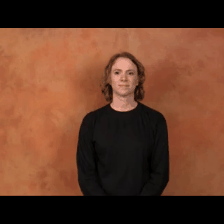

In [ ]:
print(sample_video.shape)
to_gif(sample_video)


In [10]:
from pathlib import Path
class FrameGenerator:
  def __init__(self, path, n_frames, training = False):
    """ Returns a set of frames with their associated label. 

      Args:
        path: Video file paths.
        n_frames: Number of frames. 
        training: Boolean to determine if training dataset is being created.
    """
    self.path = Path(path)
    self.n_frames = n_frames
    self.training = training
    self.class_names = sorted(set(p.name for p in self.path.iterdir() if p.is_dir()))
    self.class_ids_for_name = dict((name, idx) for idx, name in enumerate(self.class_names))

  def get_files_and_class_names(self):
    video_paths = list(self.path.glob('*/*.mp4'))
    classes = [p.parent.name for p in video_paths] 
    return video_paths, classes

  def __call__(self):
    video_paths, classes = self.get_files_and_class_names()
    
    
    pairs = list(zip(video_paths, classes))
    
    if self.training:
      random.shuffle(pairs)

    for path, name in pairs:
      video_frames = frames_from_video_file(path, self.n_frames) 
      label = self.class_ids_for_name[name] # Encode labels
      print(name,label)
      yield video_frames, label

In [11]:
Train_path='/content/drive/Shareddrives/Pfe/data/train'
Test_path='/content/drive/Shareddrives/Pfe/data/test'
Val_path='/content/drive/Shareddrives/Pfe/data/val'

In [12]:
fg = FrameGenerator(Train_path, 10, training=True)

frames, label = next(fg())

print(f"Shape: {frames.shape}")
print(f"Label: {label}")

KeyboardInterrupt: ignored

In [ ]:
# Create the training set
output_signature = (tf.TensorSpec(shape = frames.shape, dtype = tf.float32),
                    tf.TensorSpec(shape = (), dtype = tf.int16))
train_ds = tf.data.Dataset.from_generator(FrameGenerator(Train_path, 10, training=True),
                                          output_signature = output_signature)

In [ ]:
print(train_ds)

<_FlatMapDataset element_spec=(TensorSpec(shape=(10, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int16, name=None))>


In [ ]:
for frames, labels in train_ds.take(10):
  print(labels)

In [ ]:
# Create the validation set
val_ds = tf.data.Dataset.from_generator(FrameGenerator(Val_path, 10),
                                        output_signature = output_signature)

In [ ]:
# Create the testing set
test_ds = tf.data.Dataset.from_generator(FrameGenerator(Test_path, 10),
                                        output_signature = output_signature)

In [ ]:
# Print the shapes of the data
train_frames, train_labels = next(iter(train_ds))
print(f'Shape of training set of frames: {train_frames.shape}')
print(f'Shape of training labels: {train_labels.shape}')

val_frames, val_labels = next(iter(val_ds))
print(f'Shape of validation set of frames: {val_frames.shape}')
print(f'Shape of validation labels: {val_labels.shape}')

test_frames, test_labels = next(iter(test_ds))
print(f'Shape of testing set of frames: {test_frames.shape}')
print(f'Shape of testing labels: {test_labels.shape}')

advantage 27
geometry 774
Shape of training set of frames: (10, 224, 224, 3)
Shape of training labels: ()
book 210
book 210
Shape of validation set of frames: (10, 224, 224, 3)
Shape of validation labels: ()
book 210
book 210
Shape of testing set of frames: (10, 224, 224, 3)
Shape of testing labels: ()


Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [ ]:
train_ds = train_ds.batch(2)
val_ds = val_ds.batch(2)
test_ds = test_ds.batch(2)

try:
    train_frames, train_labels = next(iter(train_ds))
except Exception as e:
    # re-raise as a Python exception
    raise RuntimeError(str(e))
print(f'Shape of training set of frames: {train_frames.shape}')
print(f'Shape of training labels: {train_labels}')

try:
    val_frames, val_labels = next(iter(val_ds))
except Exception as e:
    # re-raise as a Python exception
    raise RuntimeError(str(e))
print(f'Shape of validation set of frames: {val_frames.shape}')
print(f'Shape of validation labels: {val_labels.shape}')

try:
    test_frames, train_labels = next(iter(test_ds))
except Exception as e:
    # re-raise as a Python exception
    raise RuntimeError(str(e))
print(f'Shape of testing set of frames: {test_frames.shape}')
print(f'Shape of testing labels: {test_labels.shape}')

normal 1169
relax 1429
balloon 144
shock 1554
admit 23
chapter 318
soon 1636
size 1588
wonder 1973
cost 425
bitter 195
copy 421
lemon 1010
listen 1034
cookie 417
wolf 1971
inform 919
relief 1431
exchange 652
while 1952
learn 1005
cut 456
downstairs 560
manager 1062
buy 264
pencil 1254
dizzy 545
forever 731
calm 275
up 1882
illegal 905
concept 394
peel 1252
meet 1078
precious 1325
silver 1574
light 1024
bear 159
poop 1305
rather 1406
underwear 1877
bite 194
feel 694
recover 1418
need 1147
april 87
independent 914
destroy 505
honor 878
procrastinate 1353
transfer 1848
connect 401
review 1461
enormous 627
braid 230
question 1391
farm 682
love 1049
spill 1654
bully 254
alone 54
this 1802
same 1497
cherry 329
counsel 428
baptize 147
period 1262
crash 438
dream 566
position 1309
push 1382
sweep 1733
nephew 1151
w 1909
label 983
cough 427
peach 1249
engine 622
headache 845
beginning 170
someday 1629
gloves 788
place 1287
music 1133
death 473
embarrass 613
agreement 40
federal 691
square 1663


In [ ]:
net = tf.keras.applications.EfficientNetB0(include_top = False)
net.trainable = False

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=255),
    tf.keras.layers.TimeDistributed(net),
    tf.keras.layers.Dense(10),

    tf.keras.layers.GlobalAveragePooling3D()
])

model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])


model.fit(train_ds, 
          epochs = 10,
          validation_data = val_ds,
          callbacks = tf.keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss'))

In [ ]:
folders=get_class('/content/drive/Shareddrives/Pfe/data/test')

In [ ]:
folders_x=get_class('/content/drive/Shareddrives/Pfe/data/val')

In [ ]:
df__ = pd.DataFrame({'FolderName': folders})

In [ ]:
df__

,FolderName
0,book
1,drink
2,computer
3,before
4,chair
...,...
1995,washington
1996,waterfall
1997,weigh
1998,wheelchair


In [ ]:
df_2=pd.DataFrame({'FolderName': folders2})

In [ ]:
df_2x=pd.DataFrame({'FolderName': folders_x})

In [ ]:
merged = pd.merge(df__, df_2, on='FolderName', how='outer', indicator=True)

# Get only the rows that are different
difference = merged[merged['_merge'] != 'both']


In [ ]:
difference

,FolderName,_merge


In [ ]:
merged1 = pd.merge(df__, df_2x, on='FolderName', how='outer', indicator=True)

# Get only the rows that are different
difference1 = merged1[merged1['_merge'] != 'both']

In [ ]:
difference1

,FolderName,_merge


In [ ]:
merged2 = pd.merge(df_2, df_2x, on='FolderName', how='outer', indicator=True)

# Get only the rows that are different
difference2 = merged2[merged2['_merge'] != 'both']

In [ ]:
difference2

,FolderName,_merge
